In [2]:
# hiding slideshow setup etc
hide_toggle(for_next=True)

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 's'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' _'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

tata_steel = "https://i.guim.co.uk/img/media/447f7e234d9f432480a3c5bb0ec596c12ce869c5/0_340_5100_3060/master/5100.jpg?width=1900&dpr=1&s=none"
ebsd_scan = "https://i.imgur.com/YOQ9mzO.png"
apd_ebsd = "https://i.imgur.com/HobMKDG.png"
pyapd_logo = "https://raw.githubusercontent.com/mbuze/PyAPD/main/logo/logo.png"


#!/usr/bin/env python3
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "moon",
        "transition": "none",
        "start_slideshow_at": "selected",
        "enable_chalkboard": True,
     }
)

# Generative Adversarial Networks with applications in microstructure modelling: Part 1

### 2024 CMIT Summer Research Internship Programme, University of Liverpool, 16 July 2024


#### Maciej Buze, Heriot-Watt University



## Course Information

- My contact information:
   - Email: [m.buze@hw.ac.uk](mailto:m.buze@hw.ac.uk) -> questions / comments / reflections very welcome!
   - Website: https://mbuze.github.io
   - Potential PhD projects starting in October 2025 or October 2026 -> get in touch!
<br><br>
- Github repo with course materials:<br>
https://github.com/mbuze/GAN_microstructure_modelling
<br><br>
- Slides/Notes/Exercises via Jupyter notebooks
<br><br>
- Other relevant Python library PyAPD: https://github.com/mbuze/PyAPD

## Course aims and structure

### Aims

A gentle hands-on introducton to 
1. Microstructure modelling as a mathematical imaging problem
1. Generative Adversarial Networks - a well-known generative AI framework 

### Structure
- Two ~2-hour lectures: (i) Tuesday 16 July 9:30-11:30 BST, (ii) Friday 19 July 9:30-11:30 BST
- Blend of theory and live coding
- Modest homework in the form of a Jupyter notebook
- Reproducible code to play around with

## Motivation

In [5]:
hide_toggle(for_next=True)

In [6]:
Image(url= tata_steel, width=1350)

Jasper Jolly, The Guardian, Sat 15 July 2023:

"<span id="pink">To list the products that use steel is to list much of modern life</span>:
<ul>
<li> Port Talbot provided most of the steel in the Nissan Leaf electric car, built in Sunderland.
	<br>
<li> Heinz baked beans “tins” are made of its steel, as are radiators in many homes.
	<br>
<li> Construction is the plant’s biggest market: Tata made blue cladding for Everton’s football stadium, and red cladding for Liverpool’s Anfield on the other side of Stanley Park.
	<br>
<li> Another crucial growth area – and one key for the UK’s energy security – is <span id="magenta">zero-emissions power: wind turbines sit on steel stalks, and nuclear reactors are encased in steel</span>."
</ul>
<br><br>
Any optimisation of the industrial process in steel production can have massive posititve impact on reducing emissions:
<ul>
	<li><span id="green">Blast furnace at Port Talbot produced </span> 5.7m tonnes of carbon dioxide in 2022 – about <span id="green">2% of the total for the entire UK</span>.
	<br>
	<li>Electric arc furnaces (EAF) produce recycled steel with much lower carbon footprint. 
	<br>
	<li><span id="orange">Recycled steel has different properties, including the morphology of grains (<b>microstructure</b>).

In [7]:
hide_toggle(for_next=True)

In [8]:
Image(url= ebsd_scan, width=1050)

- Understanding the deformation behaviour of polycrystalline materials is crucial for numerous industrial applications
- There are powerful computational methods for simulating the mechanical behaviour of polycrystals on a computer
- Statistical studies required - we need to generate a lot of artificial samples:

In [9]:
hide_toggle(for_next=True)

In [10]:
display(HTML(f"""<table><tr><td><img src={ebsd_scan} width="600"></td><td><img src={apd_ebsd} width="600"></td></tr></table>"""))

,


## The question we will is explore is:
<br>

<h2><p style="text-align: center;">Can generative AI help us? </p></h2>

<br><br><br>
### This is an active research topic:

- <small> Chun, S., Roy, S., Nguyen, Y. T., Choi, J. B., Udaykumar, H. S., & Baek, S. S. (2020). Deep learning for synthetic microstructure generation in a materials-by-design framework for heterogeneous energetic materials. Scientific reports, 10(1), 13307 [[link]](https://www.nature.com/articles/s41598-020-70149-0).
- <small> Murgas, B., Stickel, J., & Ghosh, S. (2024). Generative adversarial network (GAN) enabled Statistically equivalent virtual microstructures (SEVM) for modeling cold spray formed bimodal polycrystals. npj Computational Materials, 10(1), 32 [[link]](https://www.nature.com/articles/s41524-024-01219-4).
- <small> Wijaya, A., Wagner, J., Sartory, B., & Brunner, R. (2024). Analyzing microstructure relationships in porous copper using a multi-method machine learning-based approach. Communications Materials, 5(1), 59 [[link]](https://www.nature.com/articles/s43246-024-00493-5).
</small>

## Training data generation

Any AI model needs to be trained on data. As often in science, in our proof-of-concept exploration we will first generate simplified artificial data. This will give us better control over the overall framework.

To this end, we will rely on `PyAPD`, a Python library for generating simplified models of microstructure that I have recently developed together with collaborators.

<small>M. Buze, J. Feydy, S.M. Roper, K. Sedighiani, D.P. Bourne (2024). Anisotropic power diagrams for polycrystal modeling: efficient generation of curved grains via optimal transport. arXiv e-prints 2403.03571, 2024 [[link to the paper]](https://arxiv.org/abs/2403.03571).</small>

In [12]:
hide_toggle(for_next=True)

In [11]:
Image(url= pyapd_logo, width=1100)

## Training data generation

In [ ]:
#pip install PyAPD

In [13]:
import PyAPD
import matplotlib.pyplot as plt # for plotting
import torch # go-to machine learning Python library
import numpy as np # NumPy is the fundamental package for scientific computing with Python.

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [14]:
apd1 = PyAPD.apd_system(
    N=15, # number of grains
    ani_thres=0.5, # anisotropy parameter
    pixel_size_prefactor=5, # create this times as many pixels (good for nice plots) 
    )
apd1.assemble_pixels() # defining the pixels

In [15]:
%%capture 
apd1.Lloyds_algorithm( # # algorithm for generating nice microstructure
    K=10, # number of iterations
) 

Lloyds iteration: 0
Optimality condition successfully overwritten.
The APD is optimal!
Percentage error =  0.9708813428878784
Lloyds iteration: 1
Optimality condition successfully overwritten.
The APD is optimal!
Percentage error =  0.774297833442688
Lloyds iteration: 2
Optimality condition successfully overwritten.
The APD is optimal!
Percentage error =  0.815849781036377
Lloyds iteration: 3
Optimality condition successfully overwritten.
The APD is optimal!
Percentage error =  0.8877776861190796
Lloyds iteration: 4
Optimality condition successfully overwritten.
The APD is optimal!
Percentage error =  0.566538393497467
Lloyds iteration: 5
Optimality condition successfully overwritten.
The APD is optimal!
Percentage error =  0.566538393497467
Lloyds iteration: 6
Optimality condition successfully overwritten.
The APD is optimal!
Percentage error =  0.8877776861190796
Lloyds iteration: 7
Optimality condition successfully overwritten.
The APD is optimal!
Percentage error =  0.8574016094207

## Training data generation

(<Figure size 756x756 with 1 Axes>, <Axes: >)

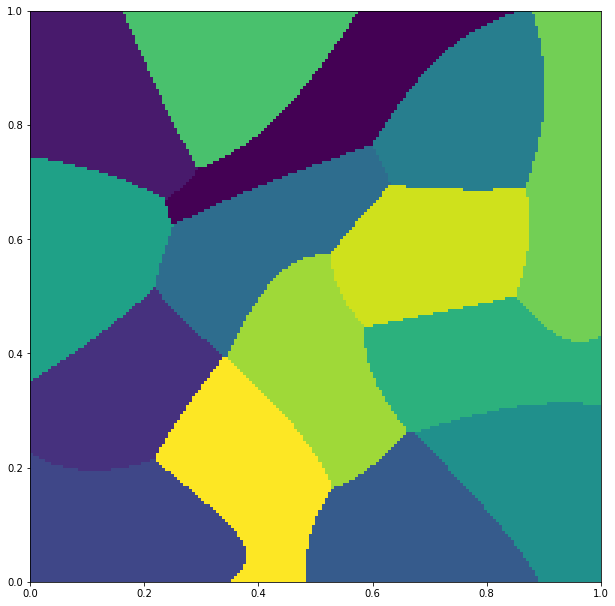

In [16]:
apd1.plot_apd()

## Training data generation

In [17]:
img = apd1.assemble_apd().reshape(apd1.pixel_params).transpose(0,1).cpu()
img_s = (img + 1)/img.max() #shift values to [0,1]

In [18]:
img_s[0,0]

tensor(0.2857)

Full data generation algorithm (see stand-alone [notebook in the Github repo](https://github.com/mbuze/GAN_microstructure_modelling/blob/main/notebooks/generating_pyapd_data.ipynb) ):

In [ ]:
# for i in range(0,14162):
#     apd1 = PyAPD.apd_system(N=15, ani_thres=0.5, seed = i)
#     apd1.check_optimality()
#     apd1.Lloyds_algorithm(K=10, verbosity_level = 0 )
#     img = apd1.assemble_apd().reshape(apd1.pixel_params).transpose(0,1).cpu() 
#     img_s = (img + 1)/(img+1).max()  #shift values to [0,1]  
#     plt.imsave(f'data/apd_data/train/mono_disperse_small/pic{i}.png', img_s,cmap=plt.cm.gray) # saving an image

## Inspecting the data

In [19]:
import os
import requests
import zipfile
from pathlib import Path

In [20]:
# Setup path to data folder
data_path = Path("data/") # path to data folder
image_path = data_path / "apd_data" # path to the specific subfolder
# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    # Download PyAPD data
    with open(data_path / "apd_data.zip", "wb") as f:
        request = requests.get("https://github.com/mbuze/GAN_microstructures_Summer_School/raw/main/data/apd_data.zip")
        print("Downloading PyAPD data...")
        f.write(request.content)
    # Unzip the data
    with zipfile.ZipFile(data_path / "apd_data.zip", "r") as zip_ref:
        print("Unzipping PyAPD data...")
        zip_ref.extractall(image_path)

data/apd_data directory exists.


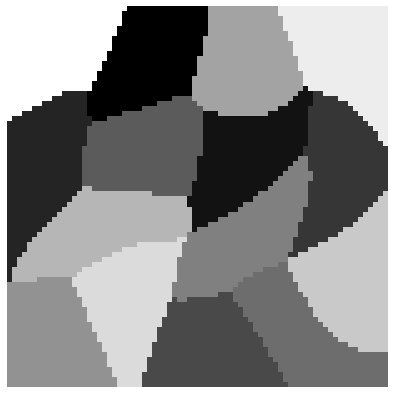

In [22]:
import random # random number generator
from PIL import Image # opening images from files
# Set seed
random.seed(41) # <- try changing this and see what happens
# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.png"))
#2. Get random image path
random_image_path = random.choice(image_path_list)
# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
# 4. Open image
img = Image.open(random_image_path)
# Turn the image into an array
img_as_array = np.asarray(img)
# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)#,cmap=plt.cm.gray)
plt.axis(False);

## Summary

- Polycrystalline metals and alloys comprise of grains with different shape, size, and crystallographic orientation.
- This leads to an interesting mathematical imaging problem.
- An ability to create high-quality artificial computer samples is highly desirable. 
- AI frameworks can help, but they rely on data.
- We have created artificial data and next time we meet we will use it to train a machine learning model.
- Final few slides contain homework exercises.

## Homework

(1) How many data points (images) does our dataset contain? You can either just type in the number or run a command that will output the number. (Hint: you can get it easily using commands from the data inspection)

In [23]:
# answer here


(2) Display the 500th image from the dataset.

In [24]:
# code goes here

(3) In the presentation the images were coloured, but in the dataset the images are grayscale. Discuss why (there is a specific line of code responsible for it). Do you think that it matters? Is it beneficial or detrimental?

Type your answer here.

(4) What are the common features of all the images we produced? (This is ultimately what we want the machine learning algorithm to learn for itself!). Try to think of at least four different features, but feel free to list as many as you want. 

Type your answer here. 